# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [9]:
# Get the datasets
!curl -o test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!curl -o train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0   2479      0 --:--:-- --:--:-- --:--:--  2666
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0   183k      0 --:--:-- --:--:-- --:--:--  206k


In [13]:
# Take a peek at the datasets
# !head train.dat
# !head test.dat
with open("train.dat", "r") as f:
    for _ in range(10):
        print(f.readline().strip())
with open("test.dat", "r") as f:
    for _ in range(10):
        print(f.readline().strip())


A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [18]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    
    result1 = sum(a*b for a, b in zip(array1, array2))
    return result1 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    result2 = 1 / (1 + math.exp(-x))
    return result2

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    result3 = (sigmoid(dot_product(weight, instance)))
    return result3

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    result4 = sigmoid(dot_product(weights, instance))
    return 1 if result4 >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Initialize Weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Forward Propagation and Compute Error
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Gradient Descent for Weight Updates
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [19]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




Because predict() returns a binary value, while sigmoid(dot_product(weights, instance)) gives a probability between 0 and 1. During training, we need this probability to calculate the error and update the weights properly using gradient descent. If we used predict(), the error would be discrete, making it impossible to compute useful gradients.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [26]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learning rate: 

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



A: Not really. More training data can help, but it’s not a guarantee. If the model is already learning well from a smaller dataset, adding more data might not make a big difference—or worse, it could introduce noise that actually hurts performance.
B:With a small learning rate (0.005), the model might not be adapting fast enough to make use of the extra data within just 20 epochs.
C:Add L1 or L2 regularization can prevent overfitting from memorizing the training data.
D:No. If you train too much, the model stops generalizing and just memorizes the training data, which makes test accuracy worse.

#tr: 20, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 20, learning rate: 0.050; A

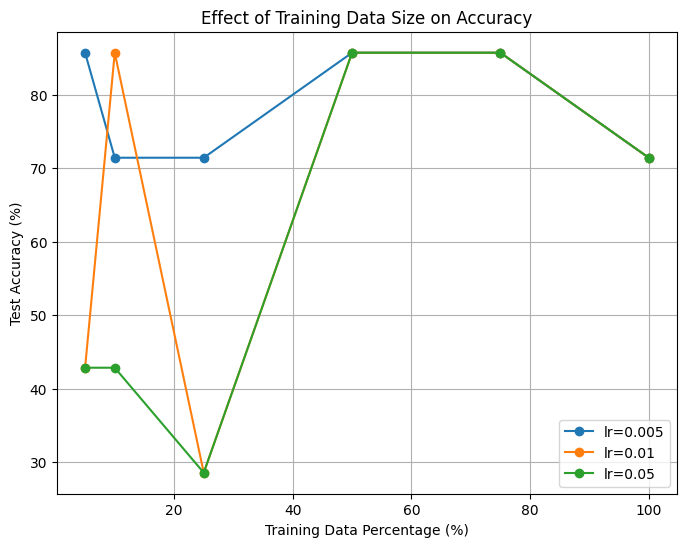

In [30]:


import matplotlib.pyplot as plt

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]  
num_epochs = [5, 10, 20, 50, 100]      
lr_array = [0.005, 0.01, 0.05]         

accuracy_results = {lr: [] for lr in lr_array}

for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]
        weights = train_perceptron(pre_instances, lr, 100) 
        accuracy = get_accuracy(weights, instances_te)
        accuracy_results[lr].append(accuracy)
        print(f"#tr: {len(pre_instances):0}, epochs: 20, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


plt.figure(figsize=(8, 6))
for lr, acc in accuracy_results.items():
    plt.plot(tr_percent, acc, marker='o', label=f"lr={lr}")

plt.xlabel("Training Data Percentage (%)")
plt.ylabel("Test Accuracy (%)")
plt.title("Effect of Training Data Size on Accuracy")
plt.legend()
plt.grid(True)
plt.show()
